# Solução de Problemas de Estatística com python

---

Este notebook contêm soluções de alguns problemas do livro de estatística básica dos autores Bussab & Morettin (MORETTIN, Pedro A.; BUSSAB, Wilton O. Estatística básica. Saraiva Educação SA, 2017.)

In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
sns.set(font_scale=1.5)

## Capítulo 4 - Análise Bidimensional
----

### Tabelas de Contingência

In [2]:
tab2_1 = pd.read_excel('dados\Dados_EB_originais.xlsx', sheet_name='Tabela 2.1')
tab2_1.head()

,N,Estado_Civil,Grau_de_Instrução,N_de_Filhos,Salario_X_minimo,Idade_Anos,Idade_Meses,Região_de_Procedência
0,1,solteiro,ensino fundamental,NaN,4.00,26,3,interior
1,2,casado,ensino fundamental,1.0,4.56,32,10,capital
2,3,casado,ensino fundamental,2.0,5.25,36,5,capital
3,4,solteiro,ensino médio,NaN,5.73,20,10,outra
4,5,solteiro,ensino fundamental,NaN,6.26,40,7,outra


#### <font color = 'orange'> Problema 4.1 </font>

Usando os dados da Tabela 2.1, Capítulo 2:

##### a) Construa a distribuição de freqüência conjunta para as variáveis grau de instrução e região de procedência.

In [3]:
conting_tab = pd.crosstab(
    index = tab2_1['Grau_de_Instrução'],
    columns = tab2_1['Região_de_Procedência']
)
conting_tab.index.name = None
conting_tab

Região_de_Procedência,capital,interior,outra
ensino fundamental,4,3,5
ensino médio,5,7,6
superior,2,2,2


##### b) Qual a porcentagem de funcionários que têm o ensino médio? 

Aqui, precisamos normalizar em relação ao total geral. Vemos então que a resposta é 50%.

In [4]:
conting_tab = pd.crosstab(
    index = tab2_1['Grau_de_Instrução'],
    columns = tab2_1['Região_de_Procedência'],
    normalize = True,
    margins=True,
    margins_name = 'Total'
)*100
conting_tab.index.name = None
conting_tab.round(2)

Região_de_Procedência,capital,interior,outra,Total
ensino fundamental,11.11,8.33,13.89,33.33
ensino médio,13.89,19.44,16.67,50.00
superior,5.56,5.56,5.56,16.67
Total,30.56,33.33,36.11,100.00


##### c) Qual a porcentagem daqueles que têm o ensino médio e são do interior? 


Conforme a tabela anterior, 19,44%.

##### d) Dentre os funcionários do interior, quantos por cento têm o ensino médio? 

Aqui, precisamos expressar os percentuais em relação ao total das colunas. Conforme a tabela gerada, a resposta é 58,33%.

In [5]:
conting_tab = pd.crosstab(
    index = tab2_1['Grau_de_Instrução'],
    columns = tab2_1['Região_de_Procedência'],
    normalize = 'columns',
    margins=True,
    margins_name='Total'
)*100
conting_tab.index.name = None
conting_tab.round(2)

Região_de_Procedência,capital,interior,outra,Total
ensino fundamental,36.36,25.00,38.46,33.33
ensino médio,45.45,58.33,46.15,50.00
superior,18.18,16.67,15.38,16.67


#### <font color = 'orange'> Problema 4.2 </font>

No problema anterior, sorteando um funcionário ao acaso entre os 36:

##### a) Qual será provavelmente o seu grau de instrução? 


Conforme item b) do problema anterior, ao selecionar um funcionário ao acaso, é mais provável que seu grau de instrução seja ensino médio, já que a proporção de pessoas com esse grau de instrução é o maior de todos.

##### b) E sua região de procedência?


Da mesma forma, é mais provável que a região de procedência de um funcionário selecionado ao acaso seja aquela classificada como OUTRA.

##### c) Qual a probabilidade do sorteado ter nível superior? 


Ainda de acordo com o resultado do item b) do problema anterior, 16,67%.

##### d) Sabendo que o sorteado é do interior, qual a probabilidade de ele possuir nível superior? 


Usando novamente a tabela do item b) do problema anterior, vemos que é 16,67%.

##### e) Sabendo que o escolhido é da capital, qual a probabilidade de ele possuir nível superior? 


18,18%.

#### <font color = 'orange'> Problema 4.4 </font>


Usando os dados do Problema 4.1, responda:

##### a) Qual a distribuição das proporções do grau de educação segundo cada uma das regiões de procedência? 


Replicada abaixo a partir do item d) do problema 4.1

In [6]:
conting_tab = pd.crosstab(
    index = tab2_1['Grau_de_Instrução'],
    columns = tab2_1['Região_de_Procedência'],
    normalize = 'columns',
    margins=True,
    margins_name='Total'
)*100
conting_tab.index.name = None
conting_tab.round(2)

Região_de_Procedência,capital,interior,outra,Total
ensino fundamental,36.36,25.00,38.46,33.33
ensino médio,45.45,58.33,46.15,50.00
superior,18.18,16.67,15.38,16.67


##### b) Baseado no resultado anterior e no Problema 4.2, você diria que existe dependência entre a região de procedência e o nível de educação do funcionário? 


De acordo com a tabela de contingência gerada, vemos que 33,33% dos funcionários possuem ensino fundamental, 50% possuem ensino médio e 16,67% possuem ensino superior, independentemente da região de procedência. Essas proporções não se mantêm nas respectivas regiões, de modo que podemos concluir que existe dependência entre as variáveis **grau de instrução** e **região de procedência**.

### Medidas de Associação entre Variáveis Qualitativas - qui-quadrado de Pearson

#### <font color = 'orange'> Problema 4.7 </font>


Usando os dados do Problema 4.1, calcule o valor de $\chi^2$ 
2 e o coeficiente de contingência C.
Esses valores estão de acordo com as conclusões obtidas anteriormente?

##### Para resolver esse problema, vamos importar a funçao `chi2_contingency()`, da biblioteca `scipy.stats`. Essa função executa um teste de hipótese para a independência das variáveis aleatórias em uma tabela de dupla entrada. Como argumento, passamos a respectiva tabela de contingência com as frequências absolutas. A função calcula as frequências esperadas com base nas somas marginais e, dessa forma, calcula o chi-quadrado de Person, que é o que nos interessa aqui.

In [7]:
from scipy.stats import chi2_contingency

In [8]:
conting_tab = pd.crosstab(
    index = tab2_1['Grau_de_Instrução'],
    columns = tab2_1['Região_de_Procedência']
)
conting_tab

Região_de_Procedência,capital,interior,outra
Grau_de_Instrução,,,
ensino fundamental,4,3,5
ensino médio,5,7,6
superior,2,2,2


In [9]:
chi2_contingency(conting_tab).statistic.round(2), chi2_contingency(conting_tab).pvalue.round(2)

(0.66, 0.96)

##### Obtivemos então a estatística do teste (o qui-quadrado de Pearson) e o p-valor do teste. Este último, por sua vez, indica que não podemos rejeitar a hipótese nula de independência entre a região de procedência e o grau de instrução, dada a amostra obtida. Essa conclusão é difente daquela que tiramos anteriormente apenas olhando para as frequências relativas na tabela de contingência.

### Associação entre Variáveis Quantitativas e entre Qualitativas e Quantitativas

#### <font color = 'orange'> Problema 4.11 </font>


Abaixo estão os dados referentes à porcentagem da população economicamente ativa
empregada no setor primário e o respectivo índice de analfabetismo para algumas regiões
metropolitanas brasileiras.

In [10]:
dados = pd.DataFrame(
    {'Regioes_Metropolitanas': ['São Paulo', 'Rio de Janeiro', 'Belém', 'Belo Horizonte', 'Salvador', 'Porto Alegre', 'Recife', 'Fortaleza'],
     'Setor_Primario': [2, 2.5, 2.9, 3.3, 4.1, 4.3, 7, 13],
     'Indice_de_Analfabetismo': [17.5, 18.5, 19.5, 22.2, 26.5, 16.6, 36.6, 38.4]
    }
)
dados

,Regioes_Metropolitanas,Setor_Primario,Indice_de_Analfabetismo
0,São Paulo,2.0,17.5
1,Rio de Janeiro,2.5,18.5
2,Belém,2.9,19.5
3,Belo Horizonte,3.3,22.2
4,Salvador,4.1,26.5
5,Porto Alegre,4.3,16.6
6,Recife,7.0,36.6
7,Fortaleza,13.0,38.4


##### a) Faça o diagrama de dispersão.

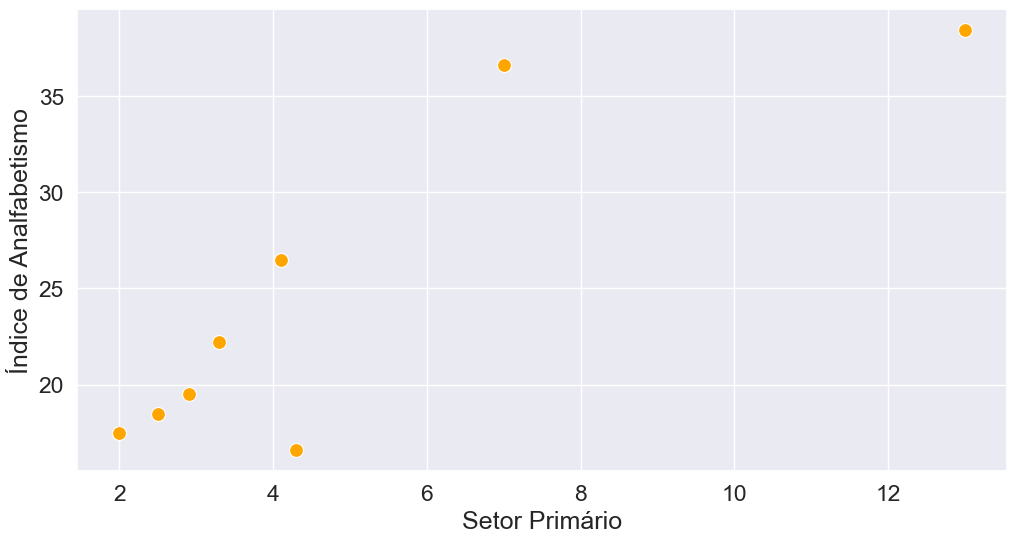

In [11]:
ax = sns.scatterplot(x = 'Setor_Primario', y = 'Indice_de_Analfabetismo', data = dados, s = 100, color = 'orange')
ax.figure.set_size_inches(12, 6)
ax.set(xlabel = 'Setor Primário', ylabel = 'Índice de Analfabetismo')
plt.show()

##### b) Você acha que existe uma dependência linear entre as duas variáveis? 


Não existem dados suficientes para dizer se existe a relação linear entre as duas variáveis.

##### c) Calcule o coeficiente de correlação. 


Vamos resolver esse usando as bibliotecas `numpy` e `scipy`:

In [12]:
np.corrcoef(dados['Setor_Primario'], dados['Indice_de_Analfabetismo']).round(3)

array([[1.   , 0.867],
       [0.867, 1.   ]])

In [13]:
from scipy.stats import pearsonr

In [14]:
pearsonr(dados['Indice_de_Analfabetismo'], dados['Setor_Primario'])

PearsonRResult(statistic=0.8665609813458788, pvalue=0.005361419993407309)

##### d) Existe alguma região com comportamento diferente das demais? Se existe, elimine o valor correspondente e recalcule o coeficiente de correlação. 


Os pontos referentes às cidades de Porto Alegre e Fortaleza parecem distoar dos demais. Vamos removê-los. Existem várias maneiras de fazer essa aqui. Vamos fazer com o método `query()`, do `pandas`:

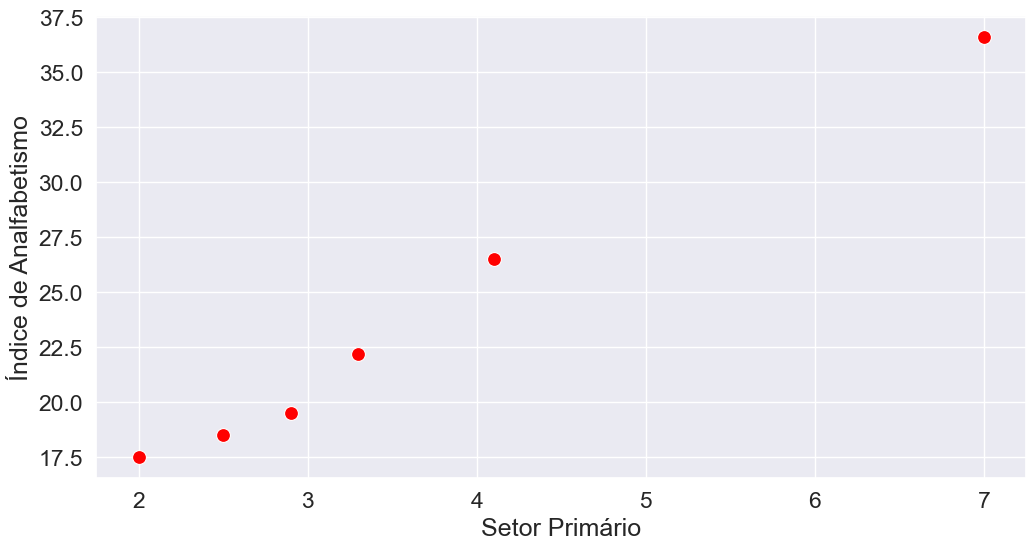

In [15]:
ax = sns.scatterplot(x = 'Setor_Primario', y = 'Indice_de_Analfabetismo', data = dados.query('Regioes_Metropolitanas not in ["Porto Alegre", "Fortaleza"]'), s = 100, color = 'red')
ax.figure.set_size_inches(12,6)
ax.set(xlabel = 'Setor Primário', ylabel = 'Índice de Analfabetismo')
plt.show()

##### Vamos também recalcular o coeficiente de correlação de Person:

In [16]:
selecao = dados.query('Regioes_Metropolitanas not in ["Porto Alegre", "Fortaleza"]')
pearsonr(selecao['Setor_Primario'], selecao['Indice_de_Analfabetismo'])

PearsonRResult(statistic=0.9941039583009691, pvalue=5.2042478619117965e-05)

##### Como podemos ver, o coeficiente de correlação sobe de 0.86 para 0.99 quando removemos os dois pontos distoantes.

#### <font color = 'orange'> Problema 4.13 </font>


Quer se verificar a relação entre o tempo de reação e o número de alternativas apresen-
tadas a indivíduos acostumados a tomadas de decisão. Planejou-se um experimento em
que se pedia ao participante para classificar objetos segundo um critério previamente
discutido. Participaram do experimento 15 executivos divididos aleatoriamente em grupos
de cinco. Pediu-se, então, a cada grupo para classificar dois, três e quatro objetos,
respectivamente. Os dados estãixo.o aba

Para resolver esse problema, vamos usar o método `repeat()`, do módulo `numpy`:

In [17]:
dados = pd.DataFrame(
    {'N_Objetos': np.repeat([2, 3, 4], 5),
    'Tempo_Reacao': [1, 2, 3, 3, 4, 2, 3, 4, 4, 5, 4, 5, 5, 6, 7]
    }
)
dados.head()

,N_Objetos,Tempo_Reacao
0,2,1
1,2,2
2,2,3
3,2,3
4,2,4


##### a) Faça o gráfico de dispersão das duas variáveis.

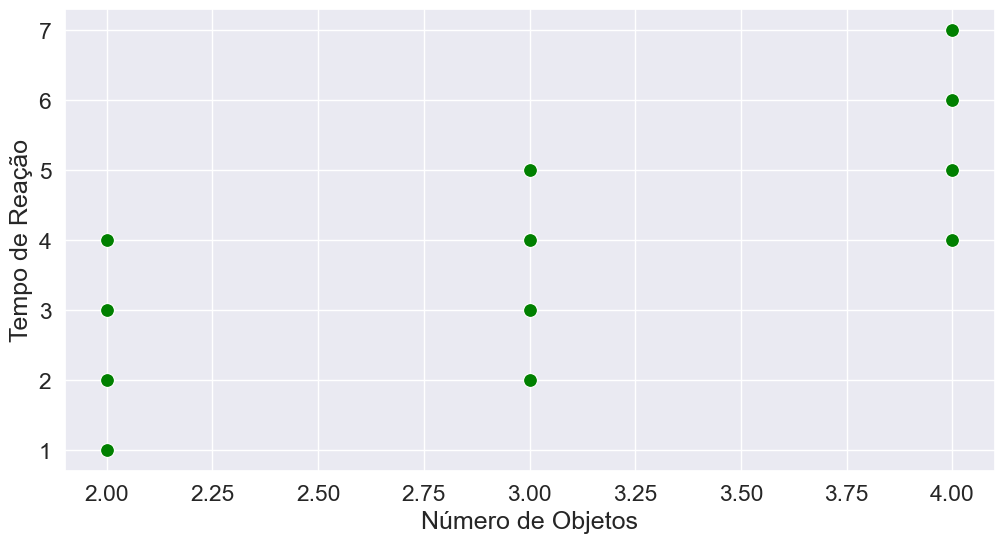

In [18]:
ax = sns.scatterplot(x = 'N_Objetos', y = 'Tempo_Reacao', data = dados, s = 100, color = 'green')
ax.figure.set_size_inches(12, 6)
ax.set(xlabel = 'Número de Objetos', ylabel = 'Tempo de Reação')
plt.show()

##### b) Qual o coeficiente de correlação entre elas?

In [19]:
np.corrcoef(dados['N_Objetos'], dados['Tempo_Reacao'])

array([[1.       , 0.7406129],
       [0.7406129, 1.       ]])

#### <font color = 'orange'> Problema 4.14 </font>


Calcule o grau de associação entre as variáveis estado civil e idade, na Tabela 2.1.

In [20]:
tab2_1.head()

,N,Estado_Civil,Grau_de_Instrução,N_de_Filhos,Salario_X_minimo,Idade_Anos,Idade_Meses,Região_de_Procedência
0,1,solteiro,ensino fundamental,NaN,4.00,26,3,interior
1,2,casado,ensino fundamental,1.0,4.56,32,10,capital
2,3,casado,ensino fundamental,2.0,5.25,36,5,capital
3,4,solteiro,ensino médio,NaN,5.73,20,10,outra
4,5,solteiro,ensino fundamental,NaN,6.26,40,7,outra


In [21]:
tab2_1['Estado_Civil'].value_counts()

Estado_Civil
casado      20
solteiro    16
Name: count, dtype: int64

In [22]:
n_casado = tab2_1['Estado_Civil'].value_counts()['casado']
n_solteiro = tab2_1['Estado_Civil'].value_counts()['solteiro']
n = n_solteiro + n_casado

In [23]:
n_casado

20

In [24]:
n_solteiro

16

In [25]:
tab2_1.groupby('Estado_Civil')['Idade_Anos'].var()

Estado_Civil
casado      34.765789
solteiro    60.916667
Name: Idade_Anos, dtype: float64

In [26]:
var_por_cat = tab2_1.groupby('Estado_Civil')['Idade_Anos'].var()
var_por_cat['casado']

34.76578947368421

In [27]:
var_bar = ((n_casado-1)*var_por_cat['casado'] + (n_solteiro-1)*var_por_cat['solteiro']) / (n-1)

In [28]:
rsq = 1 -  var_bar/ tab2_1['Idade_Anos'].var()
rsq

0.009095200629425593

##### Como podemos ver, o valor do $R^2$ (ou seja, o ganho que temos em adotar o modelo mais complexo que explica a variabilidade da idade com base no estado civil) é muito pequeno, menos de 1%. Desse modo, concluímos que as variáveis idade e estado civil estão fracamente associadas.

#### <font color = 'orange'> Problema 4.15 </font>


Usando os dados do Problema 9 do Capítulo 2, calcule o grau de associação entre seção
e notas em Estatística.

In [29]:
dados = pd.read_excel('dados/prob_4.15.xlsx')
dados.head()

,Func.,Seção,Administr.,Direito,Redação,Estatíst.,Inglês,Metodologia,Política,Economia
0,1,P,8,9,8.6,9,B,A,9.0,8.5
1,2,P,8,9,7.0,9,B,C,6.5,8.0
2,3,P,8,9,8.0,8,D,B,9.0,8.5
3,4,P,6,9,8.6,8,D,C,6.0,8.5
4,5,P,8,9,8.0,9,A,A,6.5,9.0


In [30]:
dados['Seção'].unique()

array(['P', 'T', 'V'], dtype=object)

In [31]:
n_P = dados['Seção'].value_counts()['P']
n_T = dados['Seção'].value_counts()['T']
n_V = dados['Seção'].value_counts()['V']
n = n_P + n_T + n_V

In [32]:
var_secao = dados.groupby('Seção')['Estatíst.'].var()

In [33]:
var_bar = ((n_P - 1)*var_secao['P'] + (n_T - 1)*var_secao['T'] + (n_V - 1)*var_secao['V'])/(n-1)

In [34]:
rsq = 1 - var_bar/dados['Estatíst.'].var()
rsq

0.0688798381106075

## Capítulo 5 - Probabilidades
----

### <font color = 'orange'> Probabilidade Condicional e Independência </font>

#### <font color = 'orange'> Problema 5.15: </font> Considere uma urna contendo três bolas pretas e cinco bolas vermelhas. Retire duas bolas da urna, sem reposição.

Para resolver esse problema, vamos usar o princípio da multiplicação de probabilidades, isto é,

$$ P(A \cap B) = P(A) P(B|A)$$

##### a) Obtenha os resultados possíveis e as respectivas probabilidades.

No caso de extrações sem reposição, as probabilidades relativas à segunda bola são condicionais.

In [35]:
print(f'{"Evento": ^10} | {"Probabilidade": ^20}')
print(f'{"-"*10} | {"-"*18}')
print(f'{"PP": ^10} | {"(3/8)*(2/7) = 3/28": ^20}')
print(f'{"PV": ^10} | {"(3/8)*(5/7) = 15/56": ^20}')
print(f'{"VP": ^10} | {"(5/8)*(3/7) = 15/56": ^20}')
print(f'{"VV": ^10} | {"(5/8)*(4/7) = 20/56": ^20}')

  Evento   |    Probabilidade    
---------- | ------------------
    PP     |  (3/8)*(2/7) = 3/28 
    PV     | (3/8)*(5/7) = 15/56 
    VP     | (5/8)*(3/7) = 15/56 
    VV     | (5/8)*(4/7) = 20/56 


##### b) Mesmo problema, para extrações com reposição.

No caso de extrações em reposição, as probabilidades permanecem inalteradas após a extração da primeira bola. Consequentemente, as extrações da primeira e segunda bola são eventos independentes.

In [36]:
print(f'{"Evento": ^10} | {"Probabilidade": ^20}')
print(f'{"-"*10} | {"-"*18}')
print(f'{"PP": ^10} | {"(3/8)*(3/8) = 9/64": ^20}')
print(f'{"PV": ^10} | {"(3/8)*(5/8) = 15/64": ^20}')
print(f'{"VP": ^10} | {"(5/8)*(3/8) = 15/64": ^20}')
print(f'{"VV": ^10} | {"(5/8)*(5/8) = 25/64": ^20}')

  Evento   |    Probabilidade    
---------- | ------------------
    PP     |  (3/8)*(3/8) = 9/64 
    PV     | (3/8)*(5/8) = 15/64 
    VP     | (5/8)*(3/8) = 15/64 
    VV     | (5/8)*(5/8) = 25/64 


#### <font color = 'orange'> Problema 5.16: </font> Probabilidades já mostradas no problema anterior.

#### <font color = 'orange'> Problema 5.17: </font> A probabilidade de que A resolva um problema é de 2/3, e a probabilidade de que B o resolva é de 3/4. Se ambos tentarem independentemente, qual a probabilidade de problema ser resolvido?

Nesse caso, estamos interessados na probabilidade de o problema ser resolvido por A ou por B e, se eles resolvem independentemente, temos a seguinte relação:

$$ P(A \cap B) = P(A) P(B) $$

Logo,

$$P(A \cup B) = P(A) + P(B) - P(A \cap B) = P(A) + P(B) - P(A) P(B) = \frac{2}{3} + \frac{3}{4} - \frac{2}{3}*\frac{3}{4} = \frac{11}{12} \approx 0,92$$

#### <font color = 'orange'> Problema 5.18: </font> Um dado é viciado, de tal forma que a probabilidade de sair um certo ponto é proporcional ao seu valor (por exemplo, o ponto 6 é três vezes mais provável de sair do que o ponto 2) Calcular:

##### a) a probabilidade de sair 5, sabendo-se que o ponto que saiu é ímpar;

Para começar a resolver esse problema, precisamos primeiramente conhecer o que é a probabilidade de obter cada face do dado. De acordo com o enunciado, a probabilidade de obter uma face de valor $j$ é dada por:

$$ P(j) = k*j, \ j = 1, 2, \ldots, 6.$$

Logo, precisamos determinar quem é $k$. Podemos fazer isso usando a condição de normalização das probabilidades:

$$\sum_{j = 1}^6 P_j = 1 \Rightarrow \sum_{j = 1}^6 k*j = 1 \Rightarrow 21*k = 1 \Rightarrow k = 1/21,$$

o que leva a 

$$ P(j) = j/21, \ j = 1, 2, \ldots 6. $$

$$P(5|ímpar) = \frac{P(5 \cap ímpar)}{P(ímpar)} = \frac{P(5)}{P(1) + P(3) + P(5)} = \frac{5/21}{9/21} = \frac{5}{9}.$$

##### b) a probabilidade de tirar um número par, sabendo-se que saiu um número maior que 3.

$$ P(par | >3) = \frac{P(par \ \cap > 3)}{P( > 3)} = \frac{P(4) + P(6)}{P(4) + P(5) + P(6)} = \frac{10/21}{15/21} = 10/15.$$

#### <font color = 'orange'> Problema 5.19: </font> As probabilidades de que dois eventos independentes ocorram são p e q, respectivamente. Qual   probabilidade:

##### a) de que nenhum desses eventos ocorra?

Quando falamos em nenhum dos dois eventos ocorrer, estamos interessados no evento dado pela interseção entre $A^c$ e $B^c$:

$$ P(A^c \cap B^c) = P(A^c) P(B^c | A^c).  $$

Por outro lado, se A e B são independentes, $A^c$ e $B^c$ também são, de modo que

$$ P(A^c \cap B^c) = P(A^c) P(B^c) = (1-p)*(1-q).$$

##### b) de que pelo menos um desses eventos ocorra?

Quando falamos na probabilidade de que pelo menos um dos dois eventos ocorra, estamos na verdade interessados na probabilidade da união dos dois eventos:

$$ P(A \cup B) = P(A) + P(B) - P(A \cap B) = P(A) + P(B) - P(A)*P(B) = p + q - pq.$$

#### <font color = 'orange'> Problema 5.20: </font> Na figura abaixo temos um sistema com três componentes funcionando independentemente, com confiabilidades $p_1$, $p_2$ e $p_3$ Obtenha a confiabilidade do sistema.

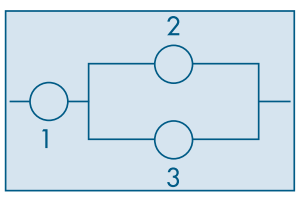

A teoria da confiabilidade estuda sistemas e seus componentes, como por exemplo sistemas mecânicos e eletrônicos (um automóvel ou um computador) e sistemas biológicos, como o corpo humano. O objetivo da teoria é estudar as relações entre o funcionamento dos componentes e do sistema.

No caso em análise, para que o sistema como um todo funcione, é necessário que os componentes 1 e 2 funcionem simultaneamente OU que os componentes 1 e 3 funcionem em simultâneo, já que os componentes 2 e 3 estão em paralelo. Para determinar essa probabilidade, vamos definir os seguintes eventos:

$A$: o componente 1 funciona

$B$: o componente 2 funciona

$C$: o componente 3 funciona

$F$: o sistema funciona

$$P(F) = P(AB) + P(AC) - P(ABC) = p_1 p_2 + p_1 p_3 - p_1 p_2 p_3 = p_1 (p_2 + p_3 - p_2 p_3).$$

#### <font color = 'orange'> Problema 5.22: </font> Supondo que todos os componentes do sistema da figura abaixo tenham a mesma confiabilidade $p$ e funcionem independentemente, otenha a confiabilidade do sistema.


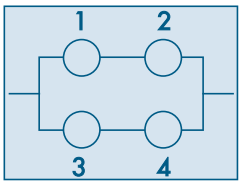

Semelhantemente ao problema anterior, o sistema em análise irá funcionar se os componentes 1 e 2 funcionarem simultaneamente OU se os componentes 3 e 4 funcionarem simultaneamente. Como cada componente tem seu funcionamente independente dos demais, temos:

$A$: o componente 1 funciona

$B$: o componente 2 funciona

$C$: o componente 3 funciona

$D$: o componente 4 funciona

$F$: o sistema funciona

$$ P(F) = P(AB) + P(CD) - P(ABCD) = p^2 + p^2 - p^4 = p^2 (2 - p^2). $$

### <font color = 'red'> O Teorema de Bayes </font>

#### <font color = 'orange'> Problema 5.23: </font> Uma companhia produz circuitos em três fábricas, I, II e III. A fábrica I produz 40% dos circuitos, enquanto a II e a III produzem 30% cada uma. As probabilidades de que um circuito integrado produzido por essas fábricas não funcione são 0,01, 0,04 e 0,03, respectivamente. Escolhido um circuito da produção conjunta das três fábricas, qual a probabilidade de o mesmo não funcionar?

Para descobrir a probabilidade de um circuito escolhido ao acaso não funcionar, precisamos determinar as interseções do evento *circuito não funciona* com cada um das fábricas. Primeiramente, vamos definir os eventos:

$N$: O circuito não funciona

$I$: O circuito foi produzido pela fábrica I

$II$: O circuito foi produzido pela fábrica II

$III$: O circuito foi produzido pela fábrica III.

Definidos os eventos, vamos calcular a probabilidade de o circuito escolhido não funcionar:

$$ N = (N \cap I) \cup (N \cap II) \cup (N \cap III) $$

$$ P(N) = P(NI) + P(NII) + P(NIII) = P(I) P(N|I) + P(II) P(N|II) + P(III) P(N|III) = 0,4*0,01 + 0,3*0,04 + 0,3*0,03 = 0,025$$

#### <font color = 'orange'> Problema 5.24: </font> Considere a situação do problema anterior, mas suponha agora que um circuito escolhido ao acaso seja defeituoso. Determine qual a probabilidade de ele ter sido fabricado por I.

O que queremos aqui é a probabilidade condicional de o circuito ter sido fabricado pela fábrica I, dado que ele não funciona. Essa probabilidade é dada por:

$$ P(I|N) = \frac{P(IN)}{P(N)} = \frac{P(I) P(N|I)}{P(N)} = \frac{P(I) P(N|I)}{P(I) P(N|I) + P(II) P(N|II) + P(III) P(N|III)} = \frac{0,4*0,01}{0,4*0,01 + 0,3*0,04 + 0,3*0,03} = 0,16 = 16\%.$$

#### <font color = 'orange'> Problema 5.25: </font> A urna I contém duas bolas pretas e três brancas, ao passo que a urna II contém três bolas pretas e três brancas. Escolhemos uma urna ao acaso e dela extraímos uma bola que tem cor branca. Se a bola é recolocada na urna, qual é a probabilidade de se retirar novamente uma bola branca da mesma urna?

Para resolver esse problema, vamos definir os eventos

$B_1$: a primeira bola selecionada é branca

$B_2$: a segunda bola selecionada é branca

$U_i$: a urna escolhida foi a i, com $i = 1, 2$

$E = B_2 B_1$: duas bolas brancas foram extraídas sequencialmente da mesma urna.

Dessa forma, temos:

$$ E = E U_1 \cup E U_2 \Rightarrow P(E) = P(U_1) P(E|U_1) + P(U_2) P(E|U_2) = P(U_1) P(B_2 B_1|U_1) + P(U_2) P(B_2 B_1|U_2). $$

Porém, os eventos $B_2$ e $B_1$ são **condicionalmente independentes**, dada a escolha de determinada urna, ou seja

$$ P(B_2 B_1|U_1) = P(B_2|U_1) P(B_1|U_1) $$

e 

$$ P(B_2 B_1|U_2) = P(B_2|U_2) P(B_1|U_2), $$

de modo que


$$ P(E) = P(U_1) P(B_2|U_1) P(B_1|U_1) + P(U_2) P(B_2|U_2) P(B_1|U_2) = \frac{1}{2} \left( \frac{3}{5} \times \frac{3}{5} + \frac{1}{2}\frac{1}{2} \right) = \frac{1}{2} \times \frac{61}{200} = 0,305. $$

#### <font color = 'red'> O Problema do Aniversário </font>

Considere $k$ pessoas numa sala. Qual a probabilidade de que pelo menos duas pessoas façam aniversário no mesmo dia e mês? A partir de qual 
valor de $k$ essa probabilidade é maior que 0,5? (Sugestão: seja A o evento “pelo menos duas pessoas fazem aniversário no mesmo dia". O evento complementar é $A^c$: “todas as $k$ pessoas fazem anirersário em dias diferentes”. Calcule primeiro a $P(A^c)$).

----

Conforme sugerido no enunciado do problema, vamos calcular a probabilidade de que todas as $k$ pessoas na sala façam anivérsário em dias diferentes. Esse problema equivale à seleção aleatória de amostras de tamanho $k$ sem reposição de elementos **ordenados** de uma população de tamanho $N$, em que os elementos da amostra são as possíveis datas de aniversário. Como todas as datas são equiprováveis (pelo menos por suposição), essa probabilidade será dada pelo quociente entre o número de amostras de tamanho $k$ sem reposição (arranjo ordenado de tamanho $k$) e o número total de amostras possíveis (ou seja, com reposição). Desse modo,

$$ 1 - p = \frac{N (N-1) \cdots (N - k + 1)}{N^k} = \frac{365 (365-1) \cdots (365 - (k - 1))}{365^k}. $$


Como existem $k$ parcelas tanto no numerador como no denominador, podemos fazer:

$$ 1 - p = \left( \dfrac{365}{365} \right) \left( \dfrac{365 - 1}{365} \right) \cdots \left( \dfrac{365 - (k - 1)}{365} \right) = \left( 1 - \frac{1}{365} \right) \left( 1 - \frac{2}{365} \right) \cdots \left( 1 - \frac{k - 1}{365} \right) .$$


Para descobrir quando essa probabilidade se torna maior que 1/2, vamos calcular uma aproximação da expressão anterior válida para valores pequenos de $k$. Para isso, vamos desprezar os termos com denominadores $(365)^2, (365)^3$, etc., os quais são da ordem de $10^{-6}$ ou menores, teremos a seguinte aproximação para a probabilidade solicitada:


$$ 1 - p \approx 1 - \frac{1 + 2 + \cdots + (k - 1)}{365} \Rightarrow p \approx \frac{1 + 2 + \cdots + (k - 1)}{365} = \frac{(k - 1)(k - 1 + 1)}{2 \cdot 365} = \frac{k (k - 1)}{730}. $$

Logo,

$$ p \approx \frac{k (k - 1)}{730}. $$

Agora, para saber quando essa probabilidade se torna maior que 0,5, precisamos resolver a seguinte inequação:

$$ \frac{k (k - 1)}{730} \geq 1/2 \Rightarrow k^2 - k - 365 \geq 0. $$

Com a raiz positiva dessa equação, e arredondando para o inteiro mais próximo, vemos que, quando $k > 20$, a probabilidade de uma sala com esse número de pessoas conter ao menos duas que façam aniversário no mesmo dia e mês é maior que 50%. 

#### <font color = 'red'> O Problema de Monty Hall </font>

Num programa de TV o objetivo é ganhar um carro como prêmio. O apresentador do programa mostra a você três portas, P1, P2 e P3: atrás de uma há um carro e, das outras, duas cabras. Ele pede a você para escolher uma porta, você escolhe P1, mas esta não é aberta. Então, ele abre uma das outras duas portas e mostra uma cabra (ele sabe o que há atrás de cada porta). Então ele pergunta se você quer mudar sua escolha de porta. O que você faria?

---- 

Primeiramente, vamos resolver esse problema de uma maneira informal: inicialmente, a probabilidade de o prêmio estar em qualquer uma das portas é 1/3. Quando escolhemos a porta P1, por exemplo, a probabilidade de o prêmio estar em uma das portas que não escolhemos é 2/3. Monty Hall então abre uma das portas, mostra que não tem o prêmio e pergunta se queremos trocar. Como a probabilidade de o prêmio estar em uma das portas que não escolhemos é 2/3, é mais vantajoso trocar de porta. Isto ocorre porque, como Monty Hall sabe exatamente onde o prêmio está, ele naturalmente vai abrir uma porta sem prêmio, de modo que a probabilidade de o prêmio estar atrás da única porta que restou é, portanto, 2/3. O ponto chave aqui é que, inicialmente, as portas são equiprováveis. Depois que uma das portas é aberta por Monty, que sabe com certeza onde o prêmio está, a porta restante se torna mais provável de conter o prêmio. Por outro lado, caso Monty não soubesse onde está o prêmio e, por acaso, abrisse uma porta que não contêm o prêmio, a probabilidade de o prêmio estar na porta restante continuaria sendo 1/3.

Vamos agora para a solução formal. Consideremos os seguintes eventos:


$P1$: o prêmio está na porta 1

$P2$: o prêmio está na porta 2

$P3$: o prêmio está na porta 3

$R1$: O apresentador revela a porta 1 (vazia)

$R2$: O apresentador revela a porta 2 (vazia)

$R3$: O apresentador revela a porta 3 (vazia).

Digamos que o jogador escolha a porta $P1$ e Monty Hall abra a porta $P2$. Nesse caso, vamos calcular a probabilidade de o prêmio estar em $P3$:

$$ P(P3|R2) = \frac{P(P3 \cap R2)}{P(R2)} \frac{P(P3) P(R2|P3)}{P(R2|P1) P(P1) + P(R2|P2) P(P2) + P(R2|P3) P(P3)} = \dfrac{ \frac{1}{3} \times 1 }{ \frac{1}{2} \times \frac{1}{3} + 0 \times \frac{1}{3} + 1 \times \frac{1}{3} } = \frac{2}{3}. $$

Logo, conforme dito acima, é mais vantajoso trocar de porta.

### Alguns Resultados Importantes do Capítulo
----

#### Axiomas Básicos da Teoria de Probabilidades

Seja $S$ o conjunto de todos os possíveis resultados de um experimento. $S$ é chamado de **espaço amostral** do experimento. Um *evento* é um subconjunto de $S$.

Se $A_i$, com $i = 1, \ldots, n$, são eventos, então o conjunto $\bigcup_{i = 1}^n A_i$, chamado de *união* desses eventos, é formado por todos os resultados que aparecem em pelo menos um dos eventos $A_i, i = 1, \ \ldots n$. Similarmente, o conjunto $\bigcap_{i = 1}^n A_i$, às vezes escrito como $A_1 \cdots A_n$, é chamado de *interseção* dos eventos $A_i$ e é formado por todos os resultados que aparecem em todos os eventos $A_i, i = 1, \ \ldots n$.

Para cada evento $A$, definimos $A^c$ como sendo correspondente a todos os resultados no espaço amostral que não estão em $A$. Chamamos $A^c$ de *complemento* do evento A. O evento $S^c$, que não possui resultados, é representado pelo símbolo $\varnothing$ e é chamado de conjunto *vazio*. Se $AB = \varnothing$, então dizemos que $A$ e $B$ são *mutuamente exclusivos*.

Para cada ponto $A$ do espaço amostral $S$, supõe-se que o número $P(A)$, chamado de probabilidade de $A$, seja definido de forma que

(i) $0 \leq P(A) \leq 1$

(ii) $P(S) = 1$

(iii) Para eventos $A_i$ mutuamente exclusivos, $i \geq 1$,


$$ P \left( \bigcup_{i = 1}^\infty A_i \right) = \sum_{i = 1}^\infty P(A_i),$$


em que $P(A)$ representa a probabilidade de que o resultado do experimento esteja em A.

Outras duas identidades importantes são as seguintes:


$$ P(A^c) = 1 - P(A) $$

e 

$$ P(A \cup B) = P(A) + P(B) - P(AB), $$

em que esta última pode ser generalizada para mais de dois eventos.

Por fim, consideremos que o espaço amostral $S$ seja finito e que cada um dos pontos do conjunto tenha a mesma probabilidade de ocorrer. Sendo assim,

$$ P(A) = \frac{n(A)}{n(B)}, $$

em que $n(A)$ é o número de pontos que caracterizam o evento $A$ e $n(B)$ é o número de pontos que caracterizam o evento $B$. A probabilidade $P(A)$, nesse caso, pode ser interpretada como uma frequência relativa de ocorrência em uma longa sequência de experimentos ou como uma medida de crença.

#### Definição de Probabilidade Condicional

Para os eventos E e F, a probabilidade condicional de E dado que F ocorreu é dada por

$$ P(E|F) = \frac{P(EF)}{P(F)}. $$

A definição dada acima conduz à regra de multiplicação de probabilidades:

$$ P(EF) = P(F)P(E|F),$$

a qual pode ser generalizada para mais que dois eventos.

#### Identidade para eventos mutuamente exclusivos em um espaco amostral

Uma identiade valiosa é

$$ P(E) = P(E|F)P(F) + P(E|F^c)P(F^c). $$

A expressão acima pode ser generalizada para $n$ eventos mutuamente exclusivos que compõem um espaço amostral. Suponha que $F_1, F_2, \ldots, F_n$ sejam eventos mutuamente exclusivos tais que

$$ \bigcup_{i = 1}^n F_i = S. $$

Em outras palavras, exatamente um dos eventos $F_1, F_2, \ldots, F_n$ deve ocorrer. Podemos expressar um evento qualquer E como a interseção com cada um dos eventos $F_i$:

$$ E = \bigcup_{i = 1}^n EF_i. $$

Em outras palavras, exatamente um dos eventos $F_1, F_2, \ldots, F_n$ deve ocorrer. Como os eventos $F_i$ são mutuamente exclusivos, podemos escrever

$$ P(E) = \sum_{i = 1}^n P(EF_i) = \sum_{i = 1}^n P(E|F_i)P(F_i). $$

A identidade acima nos conduz ao Teorema de Bayes (ou fórmula de Bayes): 

$$ P(F_j|E) = \frac{P(E|F_j) P(F_j)}{\sum_{i = 1}^n P(E|F_i)P(F_i)}. $$

Se os eventos $F_i, i = 1, \ldots, n$ são hipóteses concorrentes, então a fórmula de Bayes mostra como calcular as probabilidades condicionais dessas hipóteses quando a evidência adicional $E$ se torna possível.

#### Eventos Independentes

Se $$ P(EF) = P(E)P(F), $$

dizemos que os eventos $E$ e $F$ são independentes. A expressão acima também é equivalente a

$$ P(E|F) = P(E) $$

e 

$$ P(F|E) = P(E). $$

Assim, os eventos $E$ e $F$ são independentes se o conhecimento da ocorrência de um deles não afetar a probabilidade do outro.

#### Independência Condicional

Um importante conceito da teoria de probabilidades é o da independência condicional de eventos. Dizemos que os eventos $E_1$ e $E_2$ são *condicionalmente independentes* dado $F$ se, dado que $F$ ocorreu, a probabilidade condicional de $E_1$ ocorrer não seja afetada pela informação de que $E_2$ tenha ocorrido ou não. Mais formalmente, $E_1$ e $E_2$ são ditos condicionalmente independentes dado $F$ se

$$ P(E_1|E_2F) = P(E_1|F) $$

ou, equivalentemente,

$$ P(E_1E_2|F) = P(E_1|F) P(E_2|F). $$

#### Usando a fórmula de Bayes sequencialmente

Suponha que existam $n$ hipóteses mutuamente exclusivas e exaustivamente possíveis, com probabilidades iniciais (às vezes chamadas de probabilidades *a priori*) $P(H_i$, com $\sum_{i = 1}^n P(H_i) = 1$. Agora, se a informação de que o evento $E$ ocorreu for recebida, então a probabilidade condicional de que $H_i$ seja a hipótese verdadeira (às vezes chamada de probabilidade *atualizada* ou *a posterior*) é, de acordo com a fórmula de Bayes: 

$$ P(H_i|E) = \frac{P(E|H_i) P(H_i)}{\sum_{j = 1}^n P(E|H_j)P(H_j)}. $$

Suponha agora que saibamos de início que $E_1$ ocorreu e depois, que $E_2$ ocorreu. Nessa situação, a probabilidade a posterior de que a hipótese $H_i$ seja a verdadeira, sabendo que $E_1$ e $E_2$ ocorreram em sequência, é dada por

$$ P(H_i|E_1E_2) = \frac{P(E_2|H_i) P(H_i|E_1)}{\sum_{j = 1}^n P(E_2|H_i) P(H_i|E_1)}, $$


desde que, para cada $j = 1, 2, \ldots, n$, os eventos $E_1$ e $E_2$ sejam condicionalmente independentes dado $H_j$, conforme já definido acima.